In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import csv
trainset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')


In [ ]:
trainset.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
trainset.shape

(3000, 23)

In [ ]:
testset.shape

(4398, 22)

Removing id,overview,poster_path,tagline,imdb_id columns

In [ ]:
trainset.drop(['id','overview','poster_path','tagline','imdb_id'], axis = 1,inplace=True)
testset.drop(['id','overview','poster_path','tagline','imdb_id'], axis = 1,inplace=True)

In [ ]:
trainset.head()

,belongs_to_collection,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
trainset.isnull().sum()

belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
original_language           0
original_title              0
popularity                  0
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

belongs_to_collection column

In [ ]:
#checking how many collections does it belong to
def get_dict(s):
    try:
        d = eval(s)   #Python's eval() allows you to evaluate arbitrary Python expressions from a string-based or compiled-code-based input
    except:
        d = {}
    return d  

In [ ]:
j = 0
for i in trainset['belongs_to_collection']:
    d = get_dict(i)
    if d != {}:
        trainset['belongs_to_collection'][j] = len(d)
    else:
         trainset['belongs_to_collection'][j] = 0
    j += 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
j = 0
for i in testset['belongs_to_collection']:
    d = get_dict(i)
    if d != {}:
        testset['belongs_to_collection'][j] = len(d)
    else:
         testset['belongs_to_collection'][j] = 0
    j += 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
trainset = trainset.rename(columns={'belongs_to_collection': 'belongs_to_how_many_coll'})
testset = testset.rename(columns={'belongs_to_collection': 'belongs_to_how_many_coll'})

In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,0,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Budget Column

In [ ]:
trainset['budget']=trainset['budget'].replace(np.NaN,trainset['budget'].mean())
testset['budget']=testset['budget'].replace(np.NaN,testset['budget'].mean())
trainset.isnull().sum()

belongs_to_how_many_coll       0
budget                         0
genres                         7
homepage                    2054
original_language              0
original_title                 0
popularity                     0
production_companies         156
production_countries          55
release_date                   0
runtime                        2
spoken_languages              20
status                         0
title                          0
Keywords                     276
cast                          13
crew                          16
revenue                        0
dtype: int64

In [ ]:
trainset.value_counts('budget')

budget
0           812
15000000     72
25000000     71
40000000     71
5000000      68
           ... 
6600000       1
6300000       1
6244087       1
6200000       1
6788000       1
Length: 406, dtype: int64

In [ ]:
#budget cannot be 0, so replacing all places where budget is 0, with the mean
#trainset['budget'] = trainset['budget'].replace(['0'],trainset['budget'].mean())
#testset['budget'] = testset['budget'].replace(['0'],testset['budget'].mean())
trainset['budget']=trainset['budget'].replace(to_replace = 0, value =trainset['budget'].mean()) 
testset['budget']=testset['budget'].replace(to_replace = 0, value =testset['budget'].mean())

In [ ]:
trainset.value_counts('budget')

budget
22531334.11    812
15000000.00     72
40000000.00     71
25000000.00     71
5000000.00      68
              ... 
6600000.00       1
6300000.00       1
6244087.00       1
6200000.00       1
6843500.00       1
Length: 406, dtype: int64

genres column

In [ ]:
j = 0
for i in trainset['genres']:
    d = get_dict(i)
    if d != {}:
        trainset['genres'][j] = d[0]['id'] 
    else:
         trainset['genres'][j] = np.NaN
    j += 1    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,14000000.00,35,NaN,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,1,40000000.00,35,NaN,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,0,3300000.00,18,http://sonyclassics.com/whiplash/,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,0,1200000.00,53,http://kahaanithefilm.com/,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,22531334.11,28,NaN,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
j = 0
for i in testset['genres']:
    d = get_dict(i)
    if d != {}:
        testset['genres'][j] = d[0]['id'] 
    else:
         testset['genres'][j] = np.NaN
    j += 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
trainset['genres'] = trainset['genres'].fillna(trainset['genres'].mode()[0])
testset['genres'] = testset['genres'].fillna(testset['genres'].mode()[0])
trainset.isnull().sum()

belongs_to_how_many_coll       0
budget                         0
genres                         0
homepage                    2054
original_language              0
original_title                 0
popularity                     0
production_companies         156
production_countries          55
release_date                   0
runtime                        2
spoken_languages              20
status                         0
title                          0
Keywords                     276
cast                          13
crew                          16
revenue                        0
dtype: int64

homepage column

In [ ]:
#has a homepage or not
j = 0
for i in trainset['homepage']:
    
    if str(trainset['homepage'][j]) == 'nan':
       trainset['homepage'][j]=0
    else:
       trainset['homepage'][j]=1  
    j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,homepage,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,14000000.00,35,0,en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,1,40000000.00,35,0,en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,0,3300000.00,18,1,en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,0,1200000.00,53,1,hi,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,22531334.11,28,0,ko,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
j = 0
for i in testset['homepage']:
    
    if str(testset['homepage'][j]) == 'nan':
       testset['homepage'][j]=0
    else:
       testset['homepage'][j]=1  
    j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
trainset = trainset.rename(columns={'homepage': 'has_homepage'})
testset = testset.rename(columns={'homepage': 'has_homepage'})

In [ ]:
trainset.isnull().sum()

belongs_to_how_many_coll      0
budget                        0
genres                        0
has_homepage                  0
original_language             0
original_title                0
popularity                    0
production_companies        156
production_countries         55
release_date                  0
runtime                       2
spoken_languages             20
status                        0
title                         0
Keywords                    276
cast                         13
crew                         16
revenue                       0
dtype: int64

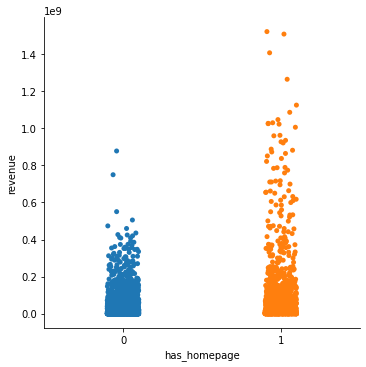

In [ ]:
sns.catplot(x='has_homepage', y='revenue', data=trainset)

original language column

In [ ]:
trainset.value_counts('original_language')

original_language
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
fa       5
da       5
ro       4
hu       3
tr       3
ml       2
pl       2
fi       2
no       2
te       2
cs       1
el       1
ur       1
bn       1
he       1
id       1
sr       1
vi       1
mr       1
nb       1
ar       1
dtype: int64

In [ ]:
#if en, then 1 otherwise 0
j = 0
for i in trainset['original_language']:
    
    if str(trainset['original_language'][j]) == 'en':
       trainset['original_language'][j]=1
    else:
       trainset['original_language'][j]=0 
    j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
j = 0
for i in testset['original_language']:
    
    if str(testset['original_language'][j]) == 'en':
       testset['original_language'][j]=1
    else:
       testset['original_language'][j]=0 
    j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
trainset = trainset.rename(columns={'original_language': 'is_en_original_language'})
testset = testset.rename(columns={'original_language': 'is_en_original_language'})

In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,14000000.00,35,0,1,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,1,40000000.00,35,0,1,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,0,3300000.00,18,1,1,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,0,1200000.00,53,1,0,Kahaani,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,22531334.11,28,0,0,마린보이,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


original title column

In [ ]:
trainset.drop(['original_title'], axis=1, inplace=True)
testset.drop(['original_title'], axis=1, inplace=True)

Production_companies column

In [ ]:
#number of production companies
j = 0
for i in trainset['production_companies']:
    d = get_dict(i)
    if d != {}:
        trainset['production_companies'][j] = len(d)
    else:
         trainset['production_companies'][j] = 0
    j += 1 
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
j = 0
for i in testset['production_companies']:
    d = get_dict(i)
    if d != {}:
        testset['production_companies'][j] = len(d)
    else:
         testset['production_companies'][j] = 0
    j += 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue
0,1,14000000.00,35,0,1,6.575393,3,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,1,40000000.00,35,0,1,8.248895,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,0,3300000.00,18,1,1,64.299990,3,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,0,1200000.00,53,1,0,3.174936,0,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,22531334.11,28,0,0,1.148070,0,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


production_countries column

In [ ]:
#create is_USA column
is_USA_prod_country = pd.DataFrame(columns=['is_USA_prod_country'])
trainset = pd.concat([trainset, is_USA_prod_country], axis=1)
testset = pd.concat([testset, is_USA_prod_country], axis=1)

In [ ]:
j = 0
for i in trainset['production_countries']:
    d = get_dict(i)
    if d != {}:
      if d[0]['iso_3166_1']=='US':
       trainset['is_USA_prod_country'][j] = 1 
      else:
       trainset['is_USA_prod_country'][j]=0
       
    else:
       trainset['is_USA_prod_country'][j]=0
    j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
j = 0
for i in testset['production_countries']:
    d = get_dict(i)
    if d != {}:
      if d[0]['iso_3166_1']=='US':
       testset['is_USA_prod_country'][j] = 1 
      else:
       testset['is_USA_prod_country'][j]=0
       
    else:
       testset['is_USA_prod_country'][j]=0
    j += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,is_USA_prod_country
0,1,14000000.00,35,0,1,6.575393,3,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,1,40000000.00,35,0,1,8.248895,1,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1
2,0,3300000.00,18,1,1,64.299990,3,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1
3,0,1200000.00,53,1,0,3.174936,0,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0
4,0,22531334.11,28,0,0,1.148070,0,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0


In [ ]:
#number of production countries
j = 0
for i in trainset['production_countries']:
    d = get_dict(i)
    if d != {}:
        trainset['production_countries'][j] = len(d)
    else:
         trainset['production_countries'][j] = 0
    j += 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
j = 0
for i in testset['production_countries']:
    d = get_dict(i)
    if d != {}:
        testset['production_countries'][j] = len(d)
    else:
         testset['production_countries'][j] = 0
    j += 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,is_USA_prod_country
0,1,14000000.00,35,0,1,6.575393,3,1,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,1,40000000.00,35,0,1,8.248895,1,1,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1
2,0,3300000.00,18,1,1,64.299990,3,1,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1
3,0,1200000.00,53,1,0,3.174936,0,1,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0
4,0,22531334.11,28,0,0,1.148070,0,1,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0


release_date column

In [ ]:
testset.isnull().sum()

belongs_to_how_many_coll      0
budget                        0
genres                        0
has_homepage                  0
is_en_original_language       0
popularity                    0
production_companies          0
production_countries          0
release_date                  1
runtime                       4
spoken_languages             42
status                        2
title                         3
Keywords                    393
cast                         13
crew                         22
is_USA_prod_country           0
dtype: int64

In [ ]:
testset.value_counts('release_date')

release_date
9/9/11     7
2/6/09     6
9/10/14    5
9/10/10    5
9/9/05     5
          ..
5/26/13    1
5/26/11    1
5/26/10    1
5/26/00    1
1/1/00     1
Length: 3289, dtype: int64

In [ ]:
testset['release_date'] = testset['release_date'].fillna(testset['release_date'].mode()[0])

In [ ]:
trainset['release_year']=trainset['release_date'].astype('str').transform(lambda x: int(x.split("/")[-1])).astype(int)
testset['release_year']=testset['release_date'].astype('str').transform(lambda x: int(x.split("/")[-1])).astype(int)
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,is_USA_prod_country,release_year
0,1,14000000.00,35,0,1,6.575393,3,1,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,15
1,1,40000000.00,35,0,1,8.248895,1,1,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4
2,0,3300000.00,18,1,1,64.299990,3,1,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,14
3,0,1200000.00,53,1,0,3.174936,0,1,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,12
4,0,22531334.11,28,0,0,1.148070,0,1,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,9


In [ ]:
trainset['release_month']=trainset['release_date'].astype('str').transform(lambda x: int(x.split("/")[-0])).astype(int)
testset['release_month']=testset['release_date'].astype('str').transform(lambda x: int(x.split("/")[-0])).astype(int)
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,is_USA_prod_country,release_year,release_month
0,1,14000000.00,35,0,1,6.575393,3,1,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,15,2
1,1,40000000.00,35,0,1,8.248895,1,1,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4,8
2,0,3300000.00,18,1,1,64.299990,3,1,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,14,10
3,0,1200000.00,53,1,0,3.174936,0,1,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,12,3
4,0,22531334.11,28,0,0,1.148070,0,1,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,9,2


In [ ]:
trainset.drop(['release_date'], axis = 1,inplace=True)
testset.drop(['release_date'], axis = 1,inplace=True)
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,is_USA_prod_country,release_year,release_month
0,1,14000000.00,35,0,1,6.575393,3,1,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,15,2
1,1,40000000.00,35,0,1,8.248895,1,1,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4,8
2,0,3300000.00,18,1,1,64.299990,3,1,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,14,10
3,0,1200000.00,53,1,0,3.174936,0,1,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,12,3
4,0,22531334.11,28,0,0,1.148070,0,1,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,9,2


runtime column

In [ ]:
trainset['runtime']=trainset['runtime'].replace(np.NaN,trainset['runtime'].mean())
testset['runtime']=testset['runtime'].replace(np.NaN,testset['runtime'].mean())

spoken_languages column

In [ ]:
number_of_spoken_languages = pd.DataFrame(columns=['number_of_spoken_languages'])
trainset = pd.concat([trainset, number_of_spoken_languages], axis=1)
testset = pd.concat([testset, number_of_spoken_languages], axis=1)

In [ ]:
j = 0
for i in trainset['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        trainset['number_of_spoken_languages'][j] = len(d)
    else:
         trainset['number_of_spoken_languages'][j] = 0
    j += 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
j = 0
for i in testset['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        testset['number_of_spoken_languages'][j] = len(d)
    else:
         testset['number_of_spoken_languages'][j] = 0
    j += 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,is_USA_prod_country,release_year,release_month,number_of_spoken_languages
0,1,14000000.00,35,0,1,6.575393,3,1,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,15,2,1
1,1,40000000.00,35,0,1,8.248895,1,1,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4,8,1
2,0,3300000.00,18,1,1,64.299990,3,1,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,14,10,1
3,0,1200000.00,53,1,0,3.174936,0,1,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,12,3,2
4,0,22531334.11,28,0,0,1.148070,0,1,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,9,2,1


In [ ]:
j = 0
for i in trainset['spoken_languages']:
    d = get_dict(i)
    if d != {}:
     if d[0]['iso_639_1']=='en':
        trainset['spoken_languages'][j]=1
       
     else:
        trainset['spoken_languages'][j]=0
    else:
        trainset['spoken_languages'][j]=0  
    j += 1




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
j = 0
for i in testset['spoken_languages']:
    d = get_dict(i)
    if d != {}:
     if d[0]['iso_639_1']=='en':
        testset['spoken_languages'][j]=1
       
     else:
        testset['spoken_languages'][j]=0
    else:
        testset['spoken_languages'][j]=0  
    j += 1

   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
trainset = trainset.rename(columns={'spoken_languages': 'is_en_spoken'})
testset = testset.rename(columns={'spoken_languages': 'is_en_spoken'})

In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,runtime,is_en_spoken,status,title,Keywords,cast,crew,revenue,is_USA_prod_country,release_year,release_month,number_of_spoken_languages
0,1,14000000.00,35,0,1,6.575393,3,1,93.0,1,Released,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,15,2,1
1,1,40000000.00,35,0,1,8.248895,1,1,113.0,1,Released,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4,8,1
2,0,3300000.00,18,1,1,64.299990,3,1,105.0,1,Released,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,14,10,1
3,0,1200000.00,53,1,0,3.174936,0,1,122.0,1,Released,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,12,3,2
4,0,22531334.11,28,0,0,1.148070,0,1,118.0,0,Released,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,9,2,1


In [ ]:
trainset.value_counts('is_en_spoken')

is_en_spoken
1    2375
0     625
dtype: int64

status column

In [ ]:
trainset.isnull().sum()

belongs_to_how_many_coll        0
budget                          0
genres                          0
has_homepage                    0
is_en_original_language         0
popularity                      0
production_companies            0
production_countries            0
runtime                         0
is_en_spoken                    0
status                          0
title                           0
Keywords                      276
cast                           13
crew                           16
revenue                         0
is_USA_prod_country             0
release_year                    0
release_month                   0
number_of_spoken_languages      0
dtype: int64

In [ ]:
testset.isnull().sum()

belongs_to_how_many_coll        0
budget                          0
genres                          0
has_homepage                    0
is_en_original_language         0
popularity                      0
production_companies            0
production_countries            0
runtime                         0
is_en_spoken                    0
status                          2
title                           3
Keywords                      393
cast                           13
crew                           22
is_USA_prod_country             0
release_year                    0
release_month                   0
number_of_spoken_languages      0
dtype: int64

In [ ]:
testset['status'] = testset['status'].fillna(testset['status'].mode()[0])  
testset.isnull().sum()

belongs_to_how_many_coll        0
budget                          0
genres                          0
has_homepage                    0
is_en_original_language         0
popularity                      0
production_companies            0
production_countries            0
runtime                         0
is_en_spoken                    0
status                          0
title                           3
Keywords                      393
cast                           13
crew                           22
is_USA_prod_country             0
release_year                    0
release_month                   0
number_of_spoken_languages      0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
trainset['status'] = LabelEncoder().fit_transform(trainset['status'])
testset['status'] = LabelEncoder().fit_transform(testset['status'])
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,runtime,is_en_spoken,status,title,Keywords,cast,crew,revenue,is_USA_prod_country,release_year,release_month,number_of_spoken_languages
0,1,14000000.00,35,0,1,6.575393,3,1,93.0,1,0,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,15,2,1
1,1,40000000.00,35,0,1,8.248895,1,1,113.0,1,0,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4,8,1
2,0,3300000.00,18,1,1,64.299990,3,1,105.0,1,0,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,14,10,1
3,0,1200000.00,53,1,0,3.174936,0,1,122.0,1,0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,12,3,2
4,0,22531334.11,28,0,0,1.148070,0,1,118.0,0,0,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,9,2,1


Dropping title column

In [ ]:
trainset.drop(['title'], axis = 1,inplace=True)

In [ ]:
testset.drop(['title'], axis = 1,inplace=True)

In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,runtime,is_en_spoken,status,Keywords,cast,crew,revenue,is_USA_prod_country,release_year,release_month,number_of_spoken_languages
0,1,14000000.00,35,0,1,6.575393,3,1,93.0,1,0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,15,2,1
1,1,40000000.00,35,0,1,8.248895,1,1,113.0,1,0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4,8,1
2,0,3300000.00,18,1,1,64.299990,3,1,105.0,1,0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,14,10,1
3,0,1200000.00,53,1,0,3.174936,0,1,122.0,1,0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,12,3,2
4,0,22531334.11,28,0,0,1.148070,0,1,118.0,0,0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,9,2,1


Drop Keywords column

In [ ]:
trainset.drop(['Keywords'], axis = 1,inplace=True)
testset.drop(['Keywords'], axis = 1,inplace=True)

cast column

In [ ]:
#getting number of cast members
j = 0
for i in trainset['cast']:
    d = get_dict(i)
    if d != {}:
        trainset['cast'][j] = len(d)
    else:
         trainset['cast'][j] = 0
    j += 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
j = 0
for i in testset['cast']:
    d = get_dict(i)
    if d != {}:
        testset['cast'][j] = len(d)
    else:
         testset['cast'][j] = 0
    j += 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,runtime,is_en_spoken,status,cast,crew,revenue,is_USA_prod_country,release_year,release_month,number_of_spoken_languages
0,1,14000000.00,35,0,1,6.575393,3,1,93.0,1,0,24,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,15,2,1
1,1,40000000.00,35,0,1,8.248895,1,1,113.0,1,0,20,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4,8,1
2,0,3300000.00,18,1,1,64.299990,3,1,105.0,1,0,51,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,1,14,10,1
3,0,1200000.00,53,1,0,3.174936,0,1,122.0,1,0,7,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,12,3,2
4,0,22531334.11,28,0,0,1.148070,0,1,118.0,0,0,4,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,9,2,1


crew column

In [ ]:
#getting number of crew
j = 0
for i in trainset['crew']:
    d = get_dict(i)
    if d != {}:
        trainset['crew'][j] = len(d)
    else:
         trainset['crew'][j] = 0
    j += 1  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
j = 0
for i in testset['crew']:
    d = get_dict(i)
    if d != {}:
        testset['crew'][j] = len(d)
    else:
         testset['crew'][j] = 0
    j += 1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
trainset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,runtime,is_en_spoken,status,cast,crew,revenue,is_USA_prod_country,release_year,release_month,number_of_spoken_languages
0,1,14000000.00,35,0,1,6.575393,3,1,93.0,1,0,24,72,12314651,1,15,2,1
1,1,40000000.00,35,0,1,8.248895,1,1,113.0,1,0,20,9,95149435,1,4,8,1
2,0,3300000.00,18,1,1,64.299990,3,1,105.0,1,0,51,64,13092000,1,14,10,1
3,0,1200000.00,53,1,0,3.174936,0,1,122.0,1,0,7,3,16000000,0,12,3,2
4,0,22531334.11,28,0,0,1.148070,0,1,118.0,0,0,4,2,3923970,0,9,2,1


In [ ]:
testset.isnull().sum()

belongs_to_how_many_coll      0
budget                        0
genres                        0
has_homepage                  0
is_en_original_language       0
popularity                    0
production_companies          0
production_countries          0
runtime                       0
is_en_spoken                  0
status                        0
cast                          0
crew                          0
is_USA_prod_country           0
release_year                  0
release_month                 0
number_of_spoken_languages    0
dtype: int64

In [ ]:
trainset.isnull().sum()

belongs_to_how_many_coll      0
budget                        0
genres                        0
has_homepage                  0
is_en_original_language       0
popularity                    0
production_companies          0
production_countries          0
runtime                       0
is_en_spoken                  0
status                        0
cast                          0
crew                          0
revenue                       0
is_USA_prod_country           0
release_year                  0
release_month                 0
number_of_spoken_languages    0
dtype: int64

Getting X_train and y_train

In [ ]:
trainset.columns.get_loc('revenue')

13

In [ ]:
trainset.shape

(3000, 18)

In [ ]:
X = trainset.iloc[:, 0:19]
X_train=X.drop(columns=['revenue'])
X_train.shape

(3000, 17)

In [ ]:
testset.shape

(4398, 17)

In [ ]:
y_train=trainset.iloc[:, 13]
print(y_train)

0        12314651
1        95149435
2        13092000
3        16000000
4         3923970
          ...    
2995      1596687
2996       180590
2997     89456761
2998    171963386
2999     82087155
Name: revenue, Length: 3000, dtype: int64


Checking feature importance

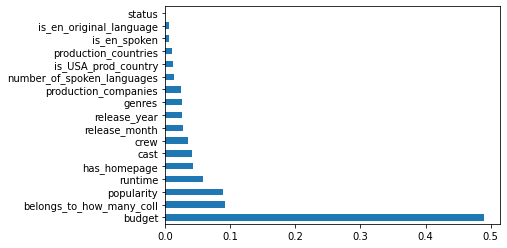

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

RFR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor1=RandomForestRegressor()

regressor1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred1=regressor1.predict(testset)
result_data1 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data1.id, 'revenue': y_pred1})
output.to_csv('my_submissionA.csv', index=False)

SVR

In [ ]:
from sklearn.svm import SVR
regressor2=SVR(kernel='rbf')
regressor2.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred2=regressor2.predict(testset)
result_data2 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data2.id, 'revenue': y_pred2})
output.to_csv('my_submissionB.csv', index=False)

catboost

In [ ]:
!pip install catboost

In [ ]:
from numpy import mean
from numpy import std
from catboost import CatBoostRegressor
best_grid = CatBoostRegressor()
best_grid.fit(X_train, y_train)
round(best_grid.score(X_train, y_train), 2)

Learning rate set to 0.04746
0:	learn: 134149353.3990327	total: 50.1ms	remaining: 50s
1:	learn: 130560246.1909094	total: 52.7ms	remaining: 26.3s
2:	learn: 127448811.2881670	total: 55.3ms	remaining: 18.4s
3:	learn: 124822671.1612775	total: 57.7ms	remaining: 14.4s
4:	learn: 121788061.4574624	total: 60.1ms	remaining: 12s
5:	learn: 118982591.8740588	total: 65.3ms	remaining: 10.8s
6:	learn: 116279462.2307398	total: 67.7ms	remaining: 9.6s
7:	learn: 113684334.8072620	total: 70ms	remaining: 8.68s
8:	learn: 111309456.3176849	total: 72.3ms	remaining: 7.96s
9:	learn: 109034330.8770985	total: 74.6ms	remaining: 7.39s
10:	learn: 106888416.1957307	total: 76.9ms	remaining: 6.91s
11:	learn: 104756400.2471948	total: 79.3ms	remaining: 6.53s
12:	learn: 102924835.3346407	total: 81.5ms	remaining: 6.18s
13:	learn: 100971393.7975153	total: 83.9ms	remaining: 5.91s
14:	learn: 99210771.3017179	total: 86.3ms	remaining: 5.66s
15:	learn: 97493674.2261971	total: 89ms	remaining: 5.47s
16:	learn: 95925307.4990224	tota

0.96

In [ ]:
y_pred3=best_grid.predict(testset)
result_data3 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data3.id, 'revenue': y_pred3})
output.to_csv('my_submissionC.csv', index=False)

Trying some feature scaling

In [ ]:
#feature scaling budget column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,1:2] = sc.fit_transform(X_train.iloc[:,1:2])   
testset.iloc[:,1:2] = sc.fit_transform(testset.iloc[:,1:2])

In [ ]:
testset.head()

,belongs_to_how_many_coll,budget,genres,has_homepage,is_en_original_language,popularity,production_companies,production_countries,runtime,is_en_spoken,status,cast,crew,is_USA_prod_country,release_year,release_month,number_of_spoken_languages
0,1,-0.181465,12,1,0,3.851534,0,2,90.0,1,1,7,2,0,7,7,2
1,0,-0.837930,27,0,1,3.559789,1,1,65.0,1,1,10,8,1,58,5,1
2,0,-0.181465,35,0,1,8.085194,3,1,100.0,1,1,9,10,1,97,5,1
3,0,-0.642631,18,1,0,8.596012,3,2,130.0,0,1,23,69,0,10,9,3
4,0,-0.782297,36,0,1,3.217680,0,1,92.0,1,1,4,14,1,5,2,1


In [ ]:
#feature scaling popularity column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,5:6] = sc.fit_transform(X_train.iloc[:,5:6])   
testset.iloc[:,5:6] = sc.fit_transform(testset.iloc[:,5:6])

In [ ]:
#feature scaling runtime column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,8:9] = sc.fit_transform(X_train.iloc[:,8:9])   
testset.iloc[:,8:9] = sc.fit_transform(testset.iloc[:,8:9])

In [ ]:
print(y_train)

0        12314651
1        95149435
2        13092000
3        16000000
4         3923970
          ...    
2995      1596687
2996       180590
2997     89456761
2998    171963386
2999     82087155
Name: revenue, Length: 3000, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor4=RandomForestRegressor()
                       

regressor4.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred4=regressor4.predict(testset)
result_data4 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data4.id, 'revenue': y_pred4})
output.to_csv('my_submissionD.csv', index=False)  #1078/1395

In [ ]:
testset['has_homepage']=testset['has_homepage'].astype('float')
testset['is_en_original_language']=testset['is_en_original_language'].astype('float')
testset['production_companies']=testset['production_companies'].astype('float')
testset['production_countries']=testset['production_countries'].astype('float')
testset['is_en_spoken']=testset['is_en_spoken'].astype('float')
testset['cast']=testset['cast'].astype('float')
testset['crew']=testset['crew'].astype('float')
testset['number_of_spoken_languages']=testset['number_of_spoken_languages'].astype('float')
testset['is_USA_prod_country']=testset['is_USA_prod_country'].astype('float')
testset['belongs_to_how_many_coll']=testset['belongs_to_how_many_coll'].astype('float')
X_train['has_homepage']=X_train['has_homepage'].astype('float')
X_train['is_en_original_language']=X_train['is_en_original_language'].astype('float')
X_train['production_companies']=X_train['production_companies'].astype('float')
X_train['production_countries']=X_train['production_countries'].astype('float')
X_train['is_en_spoken']=X_train['is_en_spoken'].astype('float')
X_train['cast']=X_train['cast'].astype('float')
X_train['crew']=X_train['crew'].astype('float')
X_train['number_of_spoken_languages']=X_train['number_of_spoken_languages'].astype('float')
X_train['is_USA_prod_country']=X_train['is_USA_prod_country'].astype('float')
X_train['belongs_to_how_many_coll']=X_train['belongs_to_how_many_coll'].astype('float')

LGBM

In [ ]:
from lightgbm import LGBMRegressor
regressor5 = LGBMRegressor(n_estimators=10000, 
                             objective='regression', 
                             metric='rmse',
                             max_depth = 5,
                             num_leaves=30, 
                             min_child_samples=100,
                             learning_rate=0.01,
                             boosting = 'gbdt',
                             min_data_in_leaf= 10,
                             feature_fraction = 0.9,
                             bagging_freq = 1,
                             bagging_fraction = 0.9,
                             importance_type='gain',
                             lambda_l1 = 0.2,
                             
                             subsample=.8, 
                             colsample_bytree=.9,
                             use_best_model=True)
regressor5.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, boosting='gbdt',
              boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
              feature_fraction=0.9, importance_type='gain', lambda_l1=0.2,
              learning_rate=0.01, max_depth=5, metric='rmse',
              min_child_samples=100, min_child_weight=0.001,
              min_data_in_leaf=10, min_split_gain=0.0, n_estimators=10000,
              n_jobs=-1, num_leaves=30, objective='regression',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
              use_best_model=True)

In [ ]:
y_pred4=regressor5.predict(testset)
result_data5 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data5.id, 'revenue': y_pred5})
output.to_csv('my_submissionE.csv', index=False) 

XGB

In [ ]:

import xgboost as xgb
regressor6 = xgb.XGBRegressor(max_depth=5, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                            objective='reg:linear', 
                            gamma=1.45, 
                            
                            silent=True,
                            subsample=0.8, 
                            colsample_bytree=0.7, 
                            colsample_bylevel=0.5)
regressor6.fit(X_train,y_train)
y_pred6=regressor6.predict(testset)
result_data6 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'id': result_data6.id, 'revenue': y_pred6})
output.to_csv('my_submissionF.csv', index=False) 